<a href="https://colab.research.google.com/github/Lansform/Emotion-Classification-NLP---EDA-ML/blob/main/emotion_classification_nlp_eda_ml_95_08_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.freecodecamp.org/news/content/images/2020/09/wall-5.jpeg)

# Introduction

*Emotion Dataset* is a dataset containing thousands of text samples, classified into *anger*, *joy* and *fear*. The objective of this work is to carry out an exploratory analysis of the data and then test machine learning models with different proposals, to achieve a better result.

In [7]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis

In [8]:
# Load dataset and show head
df = pd.read_csv("/content/Emotion_classify_Data.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [9]:
# Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [10]:
# Check nulls
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

## Percentual of each emotion

In [11]:
import plotly.express as px

In [12]:
z = df.groupby('Emotion', as_index=False)[['Comment']].count().rename({'Comment' : 'count'}, axis=1).sort_values(by='count',ascending=False)

In [13]:
fig=px.pie(z,names='Emotion',values='count',color='Emotion',hole=0.7,labels={'count':'count'}
,template='seaborn',title='<b> Percentual of each emotion </b>')
fig.update_layout(title_x=0.5)

## Word cloud

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

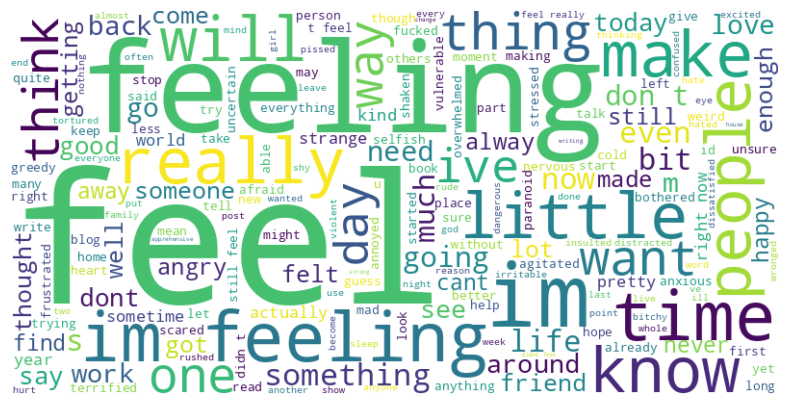

In [15]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Comment']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word frequency analysis

In [16]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [17]:
# Stopword preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Word Frequency Count
word_freq = Counter(' '.join(df['Comment']).split())

# Convert count to a DataFrame to create a bar chart
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()
word_freq_df = word_freq_df.rename(columns={'index': 'word'})

# Sort words by count
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Create an interactive bar chart with Plotly Express
fig = px.bar(word_freq_df.head(20), x='word', y='count', title='Word Frequency Analysis')
fig.update_xaxes(title_text='Word')
fig.update_yaxes(title_text='Frequency')
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Word Scatterplot

Word scatter plots display the relationship between words in a vector space (Word Embeddings) and can be useful for understanding synonyms, antonyms and related words.

In [18]:
import gensim
from gensim.models import Word2Vec

In [19]:
# Tokenization
sentences = [comment.split() for comment in df['Comment']]

#  Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # Substitua os parâmetros conforme necessário

# Extract word vectors
word_vectors = {word: model.wv[word] for word in model.wv.index_to_key}

# Create a DataFrame with the word vectors
word_vector_df = pd.DataFrame.from_dict(word_vectors, orient='index')

# Create the Word Scatterplot
fig = px.scatter(word_vector_df, x=0, y=1, text=word_vector_df.index, title='Word Scatterplot')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

## Text size histogram

The histogram will help us understand the frequency of comment sizes.

In [20]:
# Get size of each comment
df['Comment_Length'] = df['Comment'].apply(len)

# Create the text size histogram
fig = px.histogram(df, x='Comment_Length', title='Text size histogram')
fig.show()

# Machine Learning

## Data preprocessing

In [21]:
import re

In [22]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

# Replace repeated characters
def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

# Replace unique characters
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

# Replace non-alphabetic characters
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [23]:
df['clean_text'] = df['Comment']

# apply functions on text
df['clean_text'] = df['clean_text'].apply(lambda x : remove_url(x))
df['clean_text'] = df['clean_text'].apply(lambda x : decontraction(x))
df['clean_text'] = df['clean_text'].apply(lambda x : seperate_alphanumeric(x))
df['clean_text'] = df['clean_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['clean_text'] = df['clean_text'].apply(lambda x : char(x))
df['clean_text'] = df['clean_text'].apply(lambda x : x.lower())
df['clean_text'] = df['clean_text'].apply(lambda x : remove_stopwords(x))

## Load Data

In [24]:
X = df['clean_text']
y = pd.factorize(df['Emotion'])

## Vectorize Data

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vect = TfidfVectorizer()
X =  vect.fit_transform(X)

## Handling Imbalanced

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE()
X,y = smote.fit_resample(X,y[0])

## Split train and test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Fit models

Here we will analyze three different types of algorithms, to check which one best fits the dataset. A probabilistic algorithm (Naive Bayes), a non-probabilistic one (Support Vector Machine) and an ensemble algorithm (Random Forest).

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Naive Bayes

In [32]:
NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

MultinomialNB()

### Random Forest

In [33]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train, y_train)

RandomForestClassifier()

### SVM (Support Vector Machine)

In [34]:
SVM_model = svm.SVC()

SVM_model.fit(X_train, y_train)

SVC()

## Evaluate

In [35]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [36]:
y_pred = NB_model.predict(X_test)

In [37]:
acc = accuracy_score(y_test, y_pred)
acc

0.8991666666666667

### Random Forest

In [38]:
# Get the predictions for X_test and store it in y_pred
y_pred = RFC_model.predict(X_test)

In [39]:
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9516666666666667


### Support Vector Machine

In [40]:
y_pred = SVM_model.predict(X_test)

In [41]:
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9391666666666667


# Results

The model with the best results was Random Forest, with **95.08% accuracy**.

## Confusion Matrix

In [42]:
import seaborn as sns
import tensorflow as tf

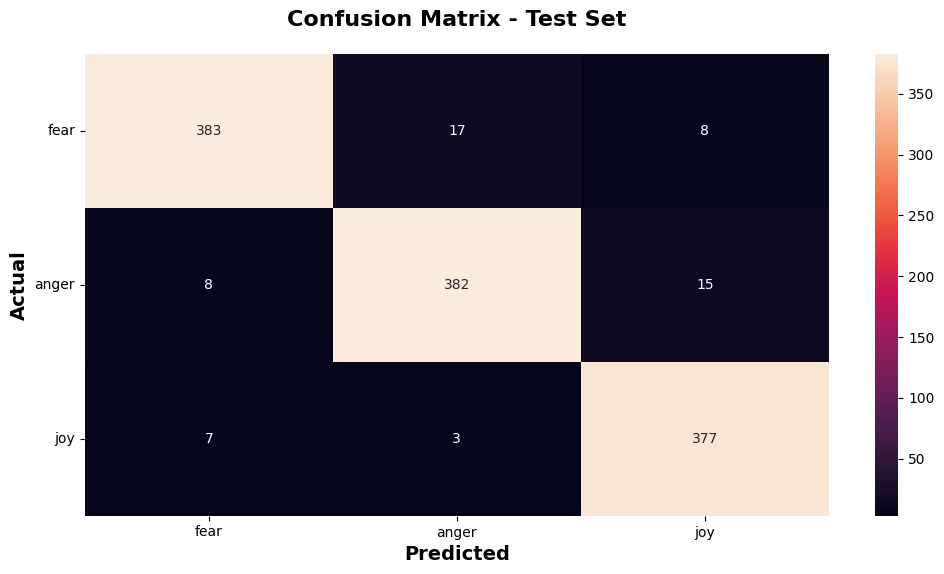

In [43]:
test_pred = RFC_model.predict(X_test)
test_labels = y_test

confusion_matrix = tf.math.confusion_matrix(test_labels, test_pred)

class_names = ["fear", "anger", "joy"]
plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

ax.set_xticklabels(class_names, rotation=0)
ax.set_yticklabels(class_names, rotation=0)

ax.set_xlabel('Predicted', fontsize=14, weight='bold')
ax.set_ylabel('Actual', fontsize=14, weight='bold')

ax.set_title('Confusion Matrix - Test Set', fontsize=16, weight='bold', pad=20)

plt.show()